# Cross response plot

In [3]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [4]:
# Using the AAPL stock
ticker_i = 'AAPL'
ticker_j = 'MSFT'
days = ['07', '08', '09', '10', '11']
tau_val = 1000
t_step = 1000

In [8]:
def cross_response_plot(ticker_i, ticker_j, days, t_step):
    """
    Plot the cross response during an interval of time (days) in independent
    plots in a figure. The data is loaded from the cross response data results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param t_step: time step in the data in ms
    """

    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, day in enumerate(days):

        print('Processing data for the stock ' + ticker_i + ' and the stock '
              + ticker_j + ' the day ' + day + ' March, 2016')

        plot = pickle.load(open(
         '../Data/cross_response_data_{}ms/cross_201603{}_{}i_{}j_{}ms.pickl'
         .format(t_step, day, ticker_i, ticker_j, t_step), 'rb'))

        plt.subplot(len(days), 1, i+1)
        plt.semilogx(plot, '-g', label='Stock i {} - Stock j {} - Day {}'
                     .format(ticker_i, ticker_j, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Cross response $ R_{ij} (\tau) $')
        plt.legend(loc='best')
        plt.title('Cross response - ticker i {} ticker j {} - {}ms'
                  .format(ticker_i, ticker_j, t_step))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir('../Data/cross_response_plot_{}ms/'.format(t_step))):
        os.mkdir('../Data/cross_response_plot_{}ms/'.format(t_step))
        print('Folder to save plot created')

    plt.savefig(
        '../Data/cross_response_plot_{}ms/cross_response_{}_{}_{}ms.png'
        .format(t_step, ticker_i, ticker_j, t_step))

    return None

Processing data for the stock AAPL and the stock MSFT the day 07 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 08 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 09 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 10 March, 2016
Processing data for the stock AAPL and the stock MSFT the day 11 March, 2016
Folder to save plot created


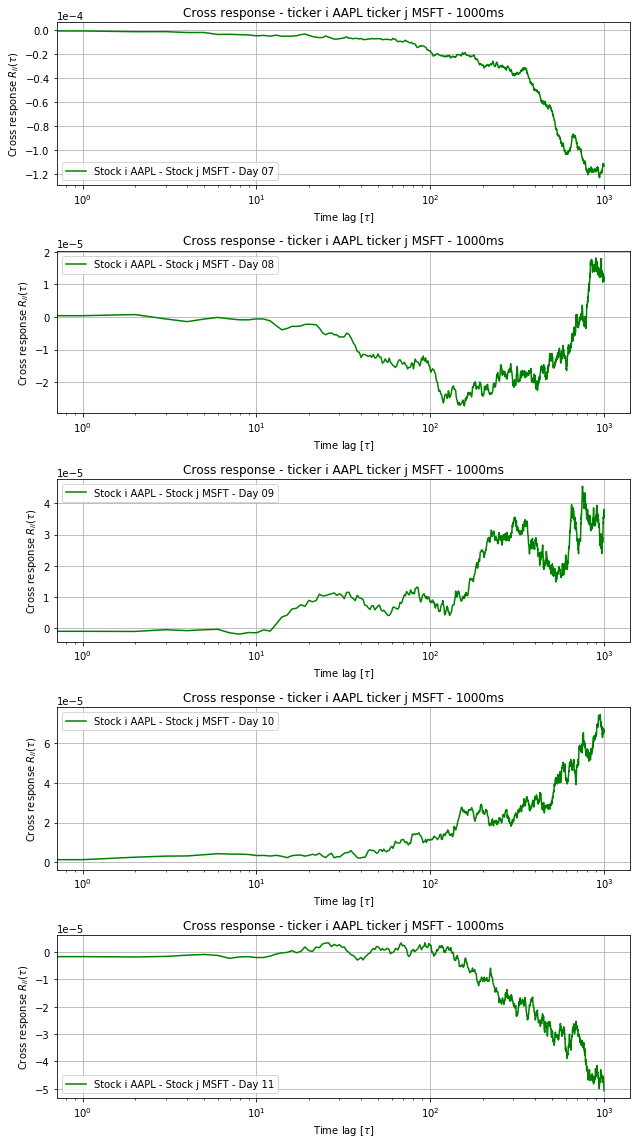

In [9]:
cross_response_plot(ticker_i, ticker_j, days, tau_val, t_step)